# Exploratory Data Analysis - Part 1: Inspection and Cleaning

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
ls ../data

player_doc.txt*     players199293.csv*  players200102.csv*  players201011.csv*
players198485.csv*  players199394.csv*  players200203.csv*  players201112.csv*
players198586.csv*  players199495.csv*  players200304.csv*  players201213.csv*
players198687.csv*  players199596.csv*  players200405.csv*  players201314.csv*
players198788.csv*  players199697.csv*  players200506.csv*  players201415.csv*
players198889.csv*  players199798.csv*  players200607.csv*  players201516.csv*
players198990.csv*  players199899.csv*  players200708.csv*  players201617.csv*
players199091.csv*  players199900.csv*  players200809.csv*  players201718.csv*
players199192.csv*  players200001.csv*  players200910.csv*


Load the player data for the 2017-18 season.

In [4]:
import pandas as pd

players_df = pd.read_csv('../data/players201718.csv')
# the Rk column is meaningless, so we drop it
players_df.drop(columns='Rk', inplace=True)

display(players_df.info())
display(players_df.describe())
display(players_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 29 columns):
Player    664 non-null object
Pos       664 non-null object
Age       664 non-null int64
Tm        664 non-null object
G         664 non-null int64
GS        664 non-null int64
MP        664 non-null int64
FG        664 non-null int64
FGA       664 non-null int64
FG%       660 non-null float64
3P        664 non-null int64
3PA       664 non-null int64
3P%       599 non-null float64
2P        664 non-null int64
2PA       664 non-null int64
2P%       646 non-null float64
eFG%      660 non-null float64
FT        664 non-null int64
FTA       664 non-null int64
FT%       606 non-null float64
ORB       664 non-null int64
DRB       664 non-null int64
TRB       664 non-null int64
AST       664 non-null int64
STL       664 non-null int64
BLK       664 non-null int64
TOV       664 non-null int64
PF        664 non-null int64
PTS       664 non-null int64
dtypes: float64(5), int64(21), object(3)


None

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,660.000000,664.000000,664.000000,599.000000,...,606.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000
mean,26.194277,43.280120,19.707831,972.881024,159.474398,347.179217,0.441359,42.266566,117.164157,0.309975,...,0.741058,39.012048,135.272590,174.284639,93.182229,31.146084,19.010542,55.010542,79.914157,428.143072
std,4.127665,27.743598,26.615675,836.159716,164.032497,348.923226,0.122191,53.970466,141.484497,0.155959,...,0.147869,50.657456,140.916498,185.176656,117.054299,31.758820,25.447931,58.457561,66.627893,446.569713
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,0.000000,186.000000,22.000000,58.000000,0.395000,1.750000,7.000000,0.250000,...,0.667000,5.000000,22.000000,29.000000,11.750000,5.000000,2.000000,8.000000,16.750000,59.000000
50%,26.000000,46.000000,4.000000,755.000000,102.000000,224.500000,0.440000,18.000000,56.500000,0.337000,...,0.768000,21.500000,95.500000,121.500000,51.000000,23.000000,10.000000,36.000000,66.500000,264.000000
75%,29.000000,71.000000,35.000000,1651.500000,253.000000,554.000000,0.493000,64.250000,189.250000,0.379500,...,0.833000,53.000000,208.000000,259.250000,126.250000,47.000000,25.000000,86.000000,132.000000,667.250000
max,41.000000,82.000000,82.000000,3026.000000,857.000000,1687.000000,1.000000,265.000000,722.000000,1.000000,...,1.000000,399.000000,848.000000,1247.000000,820.000000,177.000000,193.000000,381.000000,285.000000,2251.000000


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Alex Abrines\abrinal01,SG,24,OKC,75,8,1134,115,291,0.395,...,0.848,26,88,114,28,38,8,25,124,353
1,Quincy Acy\acyqu01,PF,27,BRK,70,8,1359,130,365,0.356,...,0.817,40,217,257,57,33,29,60,149,411
2,Steven Adams\adamsst01,C,24,OKC,76,76,2487,448,712,0.629,...,0.559,384,301,685,88,92,78,128,215,1056
3,Bam Adebayo\adebaba01,C,20,MIA,69,19,1368,174,340,0.512,...,0.721,118,263,381,101,32,41,66,138,477
4,Arron Afflalo\afflaar01,SG,32,ORL,53,3,682,65,162,0.401,...,0.846,4,62,66,30,4,9,21,56,179


### Missing Values

#### `FG%`, `3P%`, `2P%`, `FT%`, and `eFG%`

So we have a few missing value in the `FG%`, `3P%`, `2P%` and `FT%`. I would guess that they are missing values for players who have not made any field goals, three pointers, or two pointers. Let's look at a some of those to confirm.

In [5]:
players_df[players_df['FG%'].isna()][['FG','FGA', 'FG%']]

,FG,FGA,FG%
378,0,0,NaN
404,0,0,NaN
428,0,0,NaN
602,0,0,NaN


In [6]:
players_df[players_df['3P%'].isna()][['3P','3PA', '3P%']]

,3P,3PA,3P%
5,0,0,NaN
14,0,0,NaN
22,0,0,NaN
23,0,0,NaN
24,0,0,NaN
51,0,0,NaN
63,0,0,NaN
101,0,0,NaN
112,0,0,NaN
127,0,0,NaN


In [7]:
players_df[players_df['3P%'].isna()][['3P','3PA', '3P%']].describe()

,3P,3PA,3P%
count,65.0,65.0,0.0
mean,0.0,0.0,NaN
std,0.0,0.0,NaN
min,0.0,0.0,NaN
25%,0.0,0.0,NaN
50%,0.0,0.0,NaN
75%,0.0,0.0,NaN
max,0.0,0.0,NaN


In [8]:
players_df[players_df['2P%'].isna()][['2P','2PA', '2P%']]

,2P,2PA,2P%
70,0,0,NaN
82,0,0,NaN
88,0,0,NaN
96,0,0,NaN
172,0,0,NaN
173,0,0,NaN
174,0,0,NaN
250,0,0,NaN
253,0,0,NaN
378,0,0,NaN


In [9]:
players_df[players_df['FT%'].isna()][['FT','FTA', 'FT%']]

,FT,FTA,FT%
28,0,0,NaN
70,0,0,NaN
82,0,0,NaN
86,0,0,NaN
88,0,0,NaN
96,0,0,NaN
101,0,0,NaN
133,0,0,NaN
155,0,0,NaN
163,0,0,NaN


My initial assumption was correct, and I believe that filling these columns with 0 would be appropriate.

In [10]:
players_df.fillna(0.0, inplace=True)

The values differ slightly, but I assume this is due to rounding errors.

### Individual Feature Inspection

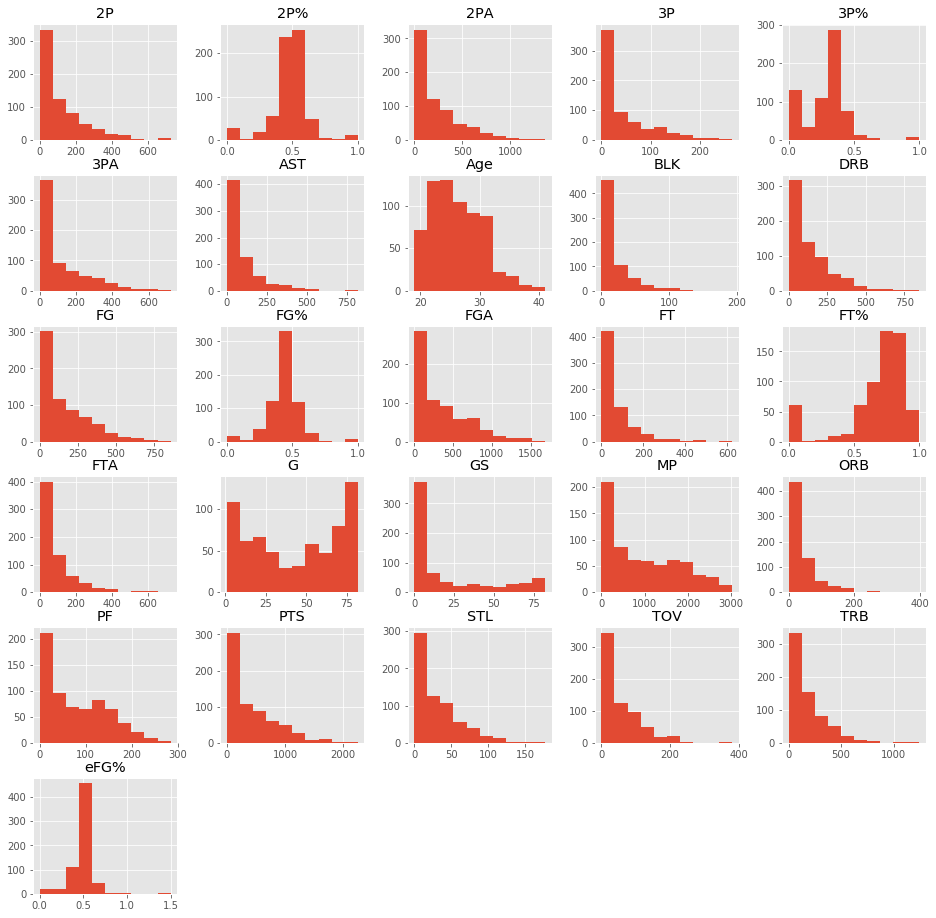

In [13]:
players_df.hist(figsize=(16,16));

#### `Player`

The `Player` column appears to have a players full name as well as a unique identifier. I want to split this column into two.

In [14]:
player_id = pd.DataFrame(players_df['Player'].apply(lambda x: x.split('\\')).tolist(), columns=['Player', 'id'])
player_id['id'].value_counts()

kilpase01    5
monrogr01    4
booketr01    4
vaughra01    4
hayesni01    4
johnsbr02    3
hoodro01     3
mudiaem01    3
wrighbr03    3
hillge01     3
stausni01    3
belinma01    3
harrito02    3
mirotni01    3
paytoel01    3
jacksde01    3
griffbl01    3
weberbr01    3
harride01    3
willitr02    3
sessira01    3
babbilu01    3
richama01    3
clarkjo01    3
muhamsh01    3
thomais02    3
jonesja04    3
canaais01    3
rosede01     3
fryech01     3
            ..
augusdj01    1
hilarne01    1
thornsi01    1
crawfja01    1
masonfr01    1
jonesda03    1
johnsda04    1
whiteis01    1
weartr01     1
hartjo01     1
hamilda02    1
evansje01    1
craigto01    1
anigbik01    1
millspa02    1
collijo01    1
ennisty01    1
linje01      1
gasolma01    1
murraja01    1
russeda01    1
onealro01    1
johnswe01    1
caulewi01    1
crawfjo02    1
korkmfu01    1
brussni01    1
barneha02    1
plumlma02    1
favorde01    1
Name: id, Length: 540, dtype: int64

I wanted to use the `id` column as an index, but since there are duplicates I will hold off for now.

In [15]:
players_df['Player'] = player_id['Player']
players_df['id']= player_id['id']

#### `Pos`

In [16]:
players_df['Pos'].value_counts()

SG       156
PG       142
C        126
PF       122
SF       115
SF-SG      2
PG-SG      1
Name: Pos, dtype: int64

#### `Age`

In [17]:
players_df['Age'].value_counts()

23    72
25    67
24    63
22    57
27    55
26    50
28    48
29    43
30    34
21    34
31    34
20    30
32    20
33    14
36    10
34     8
19     7
35     7
37     6
40     2
38     1
39     1
41     1
Name: Age, dtype: int64

#### `Tm`: Team

In [18]:
players_df['Tm'].value_counts()

TOT    59
MEM    24
LAL    24
HOU    24
MIL    24
DAL    23
PHI    23
NOP    23
ATL    22
DET    22
CLE    22
PHO    22
BRK    22
LAC    21
NYK    21
CHI    21
UTA    21
BOS    20
ORL    19
MIA    19
IND    19
DEN    18
TOR    18
SAC    18
SAS    17
CHO    17
OKC    17
GSW    17
MIN    16
POR    16
WAS    15
Name: Tm, dtype: int64

A `Tm` value of `'TOT'` indicates that the player played on multiple teams throughout the season, and the `'TOT'` row are the aggregate statistics. So I want to drop the rows where the player is listed on individual teams.

In [19]:
tm_total = players_df[players_df['Tm'] == 'TOT']['id'].unique()

drop_list = []

for player in tm_total:
    drop_list.extend(players_df[(players_df['id'] == player)&(players_df['Tm'] != 'TOT')].index)
    
players_df.drop(drop_list, inplace=True)

Now I want to see if the `id` for each player is unique, since we discovered why there were some duplicates.

In [20]:
players_df['id'].describe()

count           540
unique          540
top       dinwisp01
freq              1
Name: id, dtype: object

I can now use `id` as the index.

In [21]:
players_df.set_index('id', inplace=True)

#### `G`: Games Played

In [22]:
players_df['G'].describe()

count    540.000000
mean      48.342593
std       27.462223
min        1.000000
25%       21.000000
50%       55.500000
75%       73.000000
max       82.000000
Name: G, dtype: float64

#### `GS`: Games Started

In [23]:
players_df['GS'].describe()

count    540.000000
mean      22.777778
std       28.029316
min        0.000000
25%        0.000000
50%        7.000000
75%       43.500000
max       82.000000
Name: GS, dtype: float64

I want to make sure `GS` (games started) is less than or equal to `G` (games played)

In [24]:
(players_df['G'] >= players_df['GS']).all()

True

#### `MP`:  Minutes Played

In [25]:
players_df['MP'].describe()

count     540.000000
mean     1099.740741
std       856.743123
min         1.000000
25%       241.500000
50%      1038.500000
75%      1808.500000
max      3026.000000
Name: MP, dtype: float64

This column may be useful for feature engineering or filtering out players.

#### `FG`: Field Goals

In [26]:
players_df['FG'].describe()

count    540.000000
mean     180.435185
std      171.317468
min        0.000000
25%       30.750000
50%      137.000000
75%      286.250000
max      857.000000
Name: FG, dtype: float64

#### `FGA`: Field Goal Attempts

In [27]:
players_df['FGA'].describe()

count     540.000000
mean      392.053704
std       363.664868
min         0.000000
25%        74.750000
50%       295.500000
75%       632.250000
max      1687.000000
Name: FGA, dtype: float64

#### `FG%`: Field Goal Percentage

In [29]:
players_df['FG%'].describe()

count    540.000000
mean       0.440787
std        0.118333
min        0.000000
25%        0.398000
50%        0.441500
75%        0.494000
max        1.000000
Name: FG%, dtype: float64

I already filled in the missing values here, but I want to verify that the `FG%` features are correct based on `FG` and `FGA`.

In [46]:
has_fga = players_df[players_df['FGA'] != 0][['FG','FGA','FG%']].copy()
has_fga['FG%2'] = has_fga['FG'] / has_fga['FGA'] 

has_fga['FG%_diff'] = has_fga['FG%'] - has_fga['FG%2']
has_fga.describe()

,FG,FGA,FG%,FG%2,FG%_diff
count,537.000000,537.000000,537.000000,537.000000,537.000000
mean,181.443203,394.243948,0.443250,0.443247,0.000002
std,171.262098,363.493125,0.113963,0.113965,0.000287
min,0.000000,1.000000,0.000000,0.000000,-0.000497
25%,35.000000,76.000000,0.398000,0.398496,-0.000250
50%,138.000000,309.000000,0.442000,0.441624,0.000000
75%,287.000000,636.000000,0.494000,0.494373,0.000249
max,857.000000,1687.000000,1.000000,1.000000,0.000500


#### `3P`: 3-Point Field Goals

In [30]:
players_df['3P'].describe()

count    540.000000
mean      47.790741
std       57.149827
min        0.000000
25%        2.000000
50%       22.000000
75%       79.250000
max      265.000000
Name: 3P, dtype: float64

#### `3PA`: 3-Point Field Goal Attempts

In [28]:
players_df['3PA'].describe()

count    540.000000
mean     132.111111
std      149.430219
min        0.000000
25%        9.750000
50%       66.000000
75%      218.750000
max      722.000000
Name: 3PA, dtype: float64

#### `3P%`: 3-Point Field Goal Percentage

In [28]:
players_df['3P%'].describe()

count    540.000000
mean     132.111111
std      149.430219
min        0.000000
25%        9.750000
50%       66.000000
75%      218.750000
max      722.000000
Name: 3PA, dtype: float64

In [44]:
has_3pa = players_df[players_df['3PA'] != 0][['3P','3PA','3P%']].copy()
has_3pa['3P%2'] = has_3pa['3P'] / has_3pa['3PA'] 

has_3pa['3P%_diff'] = has_3pa['3P%'] - has_3pa['3P%2']
has_3pa.describe()

,3P,3PA,3P%,3P%2,3P%_diff
count,491.000000,491.000000,491.000000,491.000000,4.910000e+02
mean,52.560081,145.295316,0.312177,0.312178,-6.341138e-07
std,57.805920,150.475303,0.144905,0.144900,2.710145e-04
min,0.000000,1.000000,0.000000,0.000000,-4.955490e-04
25%,4.000000,18.000000,0.271500,0.271499,-2.222222e-04
50%,31.000000,91.000000,0.341000,0.340625,0.000000e+00
75%,87.000000,233.500000,0.379500,0.379436,2.222222e-04
max,265.000000,722.000000,1.000000,1.000000,5.000000e-04


#### `2P`: 2-Point Field Goals

In [33]:
players_df['2P'].describe()

count    540.000000
mean     132.644444
std      137.189912
min        0.000000
25%       20.000000
50%       89.000000
75%      204.250000
max      725.000000
Name: 2P, dtype: float64

#### `2PA`: 2-Point Field Goal Attempts

In [32]:
players_df['2PA'].describe()

count     540.000000
mean      259.942593
std       261.320612
min         0.000000
25%        45.000000
50%       177.000000
75%       394.000000
max      1361.000000
Name: 2PA, dtype: float64

#### `2P%`: 2-Point Field Goal Percentage

In [31]:
players_df['2P%'].describe()

count    540.000000
mean       0.482074
std        0.139979
min        0.000000
25%        0.440000
50%        0.496500
75%        0.545250
max        1.000000
Name: 2P%, dtype: float64

In [45]:
has_2pa = players_df[players_df['2PA'] != 0][['2P','2PA','2P%']].copy()
has_2pa['2P%2'] = has_2pa['2P'] / has_2pa['2PA'] 

has_2pa['2P%_diff'] = has_2pa['2P%'] - has_2pa['2P%2']
has_2pa.describe()

,2P,2PA,2P%,2P%2,2P%_diff
count,527.000000,527.000000,527.000000,527.000000,527.000000
mean,135.916509,266.354839,0.493966,0.493968,-0.000002
std,137.261278,261.275755,0.119134,0.119155,0.000286
min,0.000000,1.000000,0.000000,0.000000,-0.000498
25%,23.500000,52.500000,0.447500,0.447521,-0.000256
50%,97.000000,182.000000,0.500000,0.500000,0.000000
75%,209.000000,398.500000,0.547500,0.547716,0.000250
max,725.000000,1361.000000,1.000000,1.000000,0.000500


#### `eFG%`: Effective Field Goal Percentage

This weighs 2-Point and 3-Point field goals by point as such:

$eFG\% = \displaystyle\frac{FG + \displaystyle\frac{3P}{2}}{FGA}$

In [40]:
players_df['eFG%'].describe()

count    540.000000
mean       0.498554
std        0.132357
min        0.000000
25%        0.463000
50%        0.508000
75%        0.552000
max        1.500000
Name: eFG%, dtype: float64

In [43]:
players_df[players_df['eFG%'] > 1]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
id,,,,,,,,,,,,,,,,,,,,,
brownan02,Anthony Brown,SF,25,MIN,1,0,4,1,1,1.0,...,0.0,0,0,0,1,0,0,0,0,3
mitrona01,Naz Mitrou-Long,SG,24,UTA,1,0,1,1,1,1.0,...,0.0,0,0,0,0,0,0,0,0,3


As we can see, if a player has only 1 field goal attempt and it is a succesful three-pointer, they end up with a `eFG%` of 1.5. 

Let's verify these percentages.

In [47]:
has_fga = players_df[players_df['FGA'] != 0][['FG','3P','FGA','eFG%']].copy()
has_fga['eFG%2'] = (has_fga['FG'] + has_fga['3P']/2) / has_fga['FGA'] 

has_fga['eFG%_diff'] = has_fga['eFG%'] - has_fga['eFG%2']
has_fga.describe()

,FG,3P,FGA,eFG%,eFG%2,eFG%_diff
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,181.443203,48.057728,394.243948,0.501339,0.501346,-0.000007
std,171.262098,57.197276,363.493125,0.127348,0.127351,0.000288
min,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000497
25%,35.000000,2.000000,76.000000,0.464000,0.464286,-0.000248
50%,138.000000,23.000000,309.000000,0.509000,0.509195,0.000000
75%,287.000000,80.000000,636.000000,0.552000,0.552326,0.000236
max,857.000000,265.000000,1687.000000,1.500000,1.500000,0.000500


#### `FT`: Free Throws

In [34]:
players_df['FT'].describe()

count    540.000000
mean      75.746296
std       90.493537
min        0.000000
25%       11.000000
50%       43.500000
75%      110.000000
max      624.000000
Name: FT, dtype: float64

#### `FTA`: Free Throw Attempts

In [36]:
players_df['FTA'].describe()

count    540.000000
mean      98.750000
std      113.974424
min        0.000000
25%       16.000000
50%       60.000000
75%      140.250000
max      727.000000
Name: FTA, dtype: float64

#### `FT%`: Free Throw Percentage

In [35]:
players_df['FT%'].describe()

count    540.000000
mean       0.686678
std        0.232402
min        0.000000
25%        0.637500
50%        0.756000
75%        0.824250
max        1.000000
Name: FT%, dtype: float64

In [52]:
has_fta = players_df[players_df['FTA'] != 0][['FT', 'FTA','FT%']].copy()
has_fta['FT%2'] = has_fta['FT'] / has_fta['FTA'] 

has_fta['FT%_diff'] = has_fta['FT%'] - has_fta['FT%2']
has_fta.describe()

,FT,FTA,FT%,FT%2,FT%_diff
count,501.000000,501.000000,501.000000,501.000000,501.000000
mean,81.642715,106.437126,0.740132,0.740095,0.000037
std,91.353523,114.819731,0.136314,0.136308,0.000264
min,0.000000,1.000000,0.000000,0.000000,-0.000496
25%,17.000000,24.000000,0.667000,0.666667,-0.000154
50%,51.000000,69.000000,0.765000,0.764706,0.000000
75%,113.000000,148.000000,0.829000,0.829060,0.000286
max,624.000000,727.000000,1.000000,1.000000,0.000500


#### `ORB`: Offensive Rebounds

In [37]:
players_df['ORB'].describe()

count    540.000000
mean      44.242593
std       54.105806
min        0.000000
25%        7.000000
50%       26.000000
75%       61.000000
max      399.000000
Name: ORB, dtype: float64

#### `DRB`: Defensive Rebounds

In [38]:
players_df['DRB'].describe()

count    540.000000
mean     154.001852
std      147.893264
min        0.000000
25%       29.000000
50%      118.000000
75%      226.500000
max      848.000000
Name: DRB, dtype: float64

#### `TRB`: Total Rebounds

In [39]:
players_df['TRB'].describe()

count     540.000000
mean      198.244444
std       194.858655
min         0.000000
25%        38.000000
50%       152.000000
75%       297.250000
max      1247.000000
Name: TRB, dtype: float64

In [54]:
(players_df['ORB'] + players_df['DRB'] == players_df['TRB']).all()

True

#### `AST`: Assists

In [55]:
players_df['AST'].describe()

count    540.000000
mean     105.857407
std      123.760691
min        0.000000
25%       14.750000
50%       66.000000
75%      152.000000
max      820.000000
Name: AST, dtype: float64

#### `STL`: Steals

In [56]:
players_df['STL'].describe()

count    540.000000
mean      35.153704
std       32.832974
min        0.000000
25%        7.000000
50%       28.000000
75%       52.250000
max      177.000000
Name: STL, dtype: float64

#### `BLK`: Blocks

In [59]:
players_df['BLK'].describe()

count    540.000000
mean      21.937037
std       27.179874
min        0.000000
25%        3.000000
50%       13.000000
75%       30.000000
max      193.000000
Name: BLK, dtype: float64

#### `TOV`: Turnovers

In [60]:
players_df['TOV'].describe()

count    540.000000
mean      62.300000
std       61.036401
min        0.000000
25%       11.000000
50%       44.500000
75%       95.000000
max      381.000000
Name: TOV, dtype: float64

#### `PF`: Personal Fouls

In [61]:
players_df['PF'].describe()

count    540.000000
mean      90.438889
std       68.074293
min        0.000000
25%       24.000000
50%       91.000000
75%      143.250000
max      285.000000
Name: PF, dtype: float64

#### `PTS`: Points

In [62]:
players_df['PTS'].describe()

count     540.000000
mean      484.407407
std       466.914727
min         0.000000
25%        82.000000
50%       363.000000
75%       773.500000
max      2251.000000
Name: PTS, dtype: float64